# Week 1 – Feature Matching Deliverable


In [1]:
from pathlib import Path
import sys

import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


PROJECT_ROOT = Path('..').resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

#Global Varibales Setting here
ASSETS_DIR = PROJECT_ROOT / 'assets'
OUTPUT_DIR = PROJECT_ROOT / 'outputs' / 'feature_matches'
DETECTOR = 'ORB'
RATIO_THRESH = 0.70
PAIR_TOKENS = None  
MAX_PREVIEW = None 

ASSETS_DIR, OUTPUT_DIR, DETECTOR, RATIO_THRESH

from src.feature_matching_pipeline import run_pipeline

In [2]:
summaries = run_pipeline(
    image_dir=ASSETS_DIR,
    output_dir=OUTPUT_DIR,
    detector=DETECTOR,
    ratio_thresh=RATIO_THRESH,
    pair_tokens=PAIR_TOKENS,
)
print(f'Processed {len(summaries)} image pair(s).')
for summary in summaries:
    print(
        f'{summary.image_a.name} vs {summary.image_b.name}: '
        f'{summary.filtered_matches}/{summary.raw_matches} filtered matches'
    )

Processed 13 image pair(s).
img_1.jpeg vs img_2.jpeg: 329/4000 filtered matches
img_2.jpeg vs img_3.jpeg: 293/4000 filtered matches
img_3.jpeg vs img_4.jpeg: 476/4000 filtered matches
img_4.jpeg vs img_5.jpeg: 284/4000 filtered matches
img_5.jpeg vs img_6.jpeg: 426/4000 filtered matches
img_6.jpeg vs img_7.jpeg: 259/4000 filtered matches
img_7.jpeg vs img_8.jpeg: 455/4000 filtered matches
img_8.jpeg vs img_9.jpeg: 258/4000 filtered matches
img_9.jpeg vs img_10.jpeg: 150/4000 filtered matches
img_10.jpeg vs img_11.jpeg: 81/4000 filtered matches
img_11.jpeg vs img_12.jpeg: 280/4000 filtered matches
img_12.jpeg vs img_13.jpeg: 282/4000 filtered matches
img_13.jpeg vs img_14.jpeg: 236/4000 filtered matches


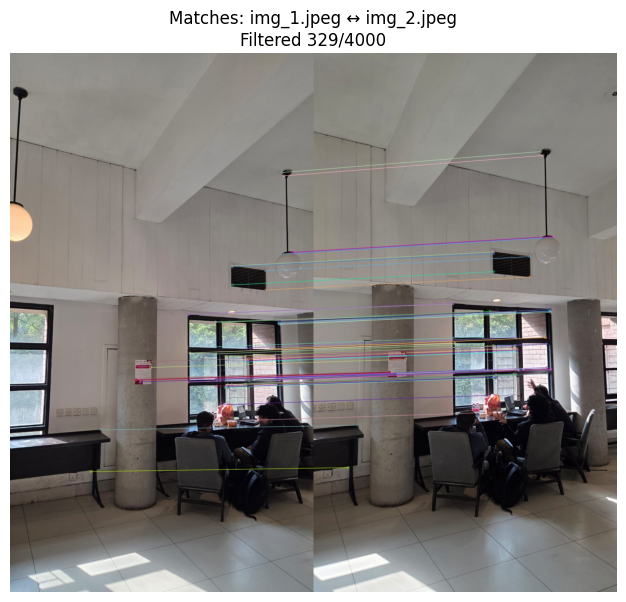

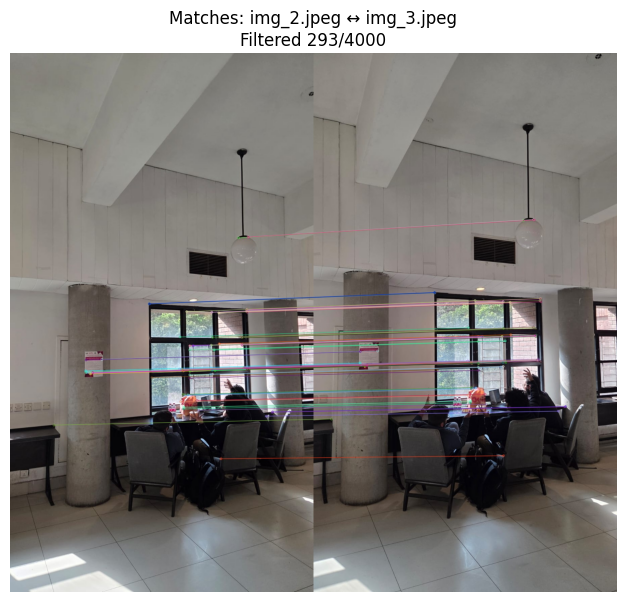

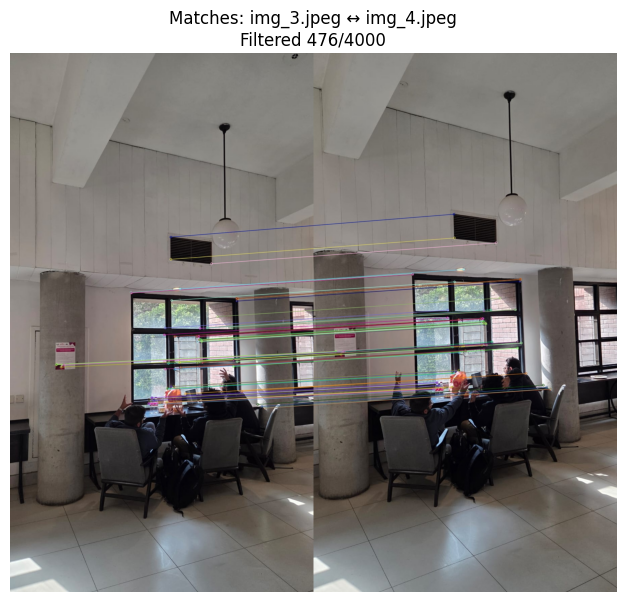

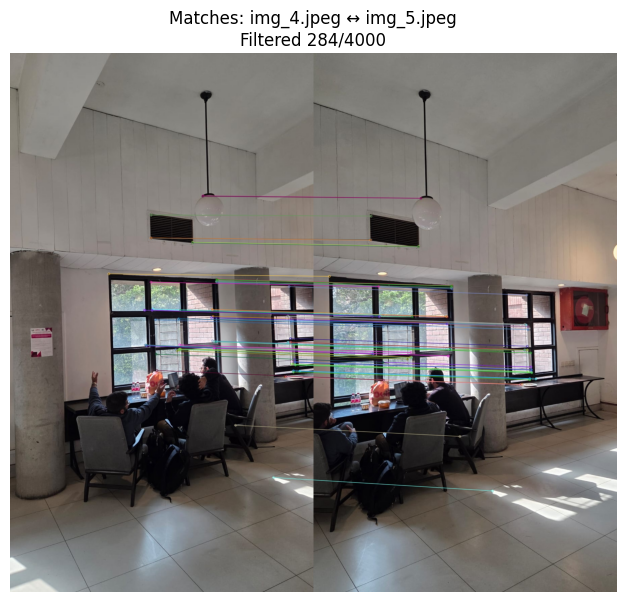

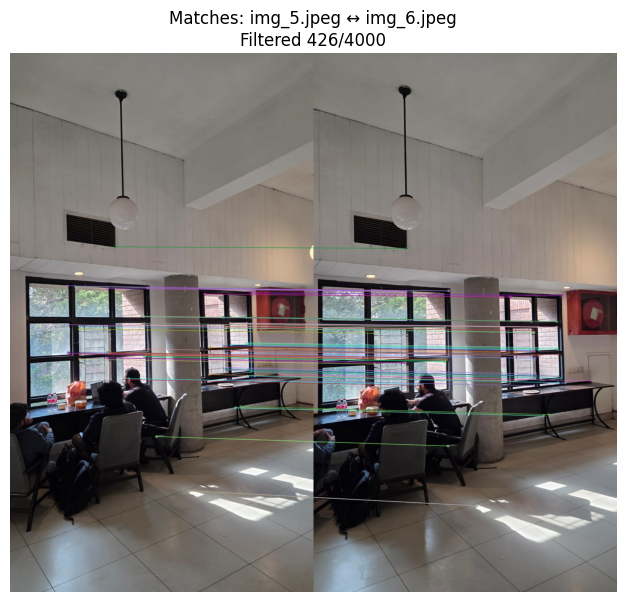

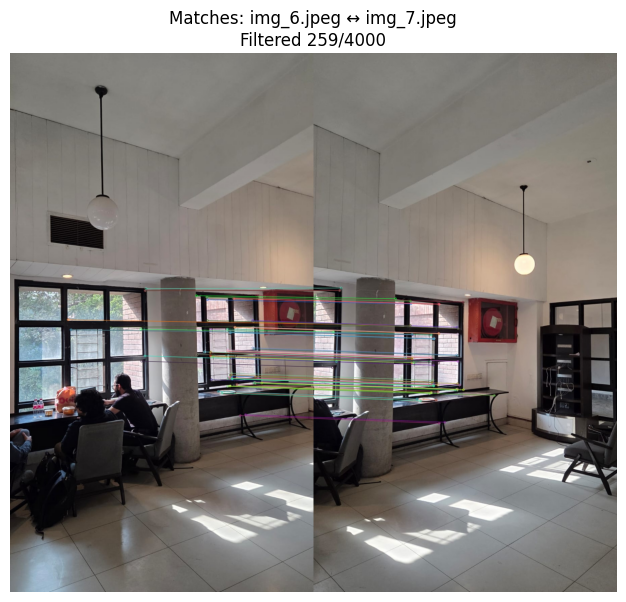

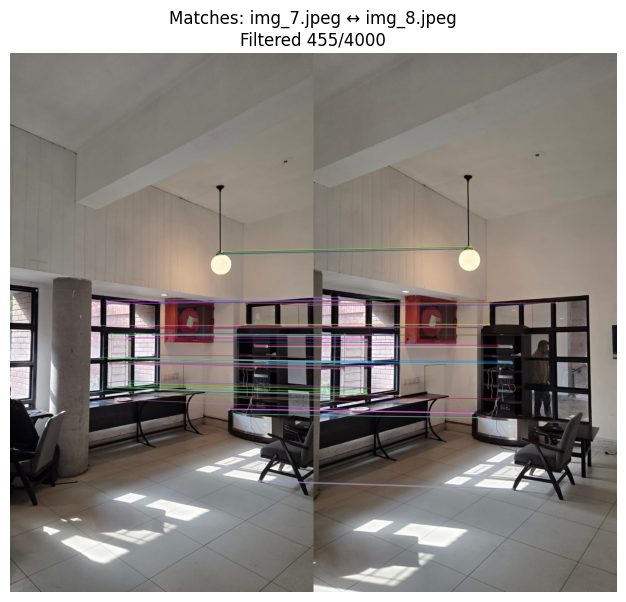

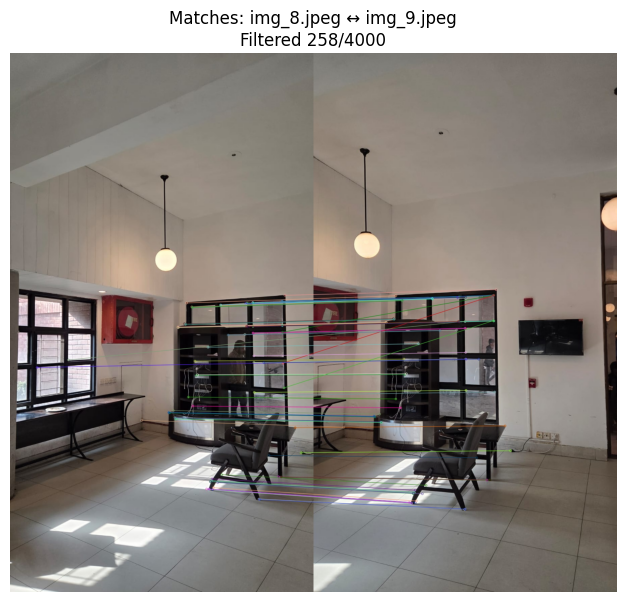

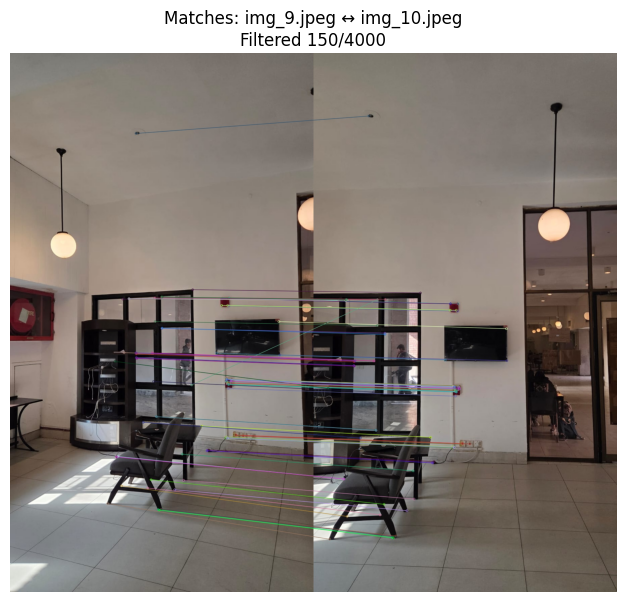

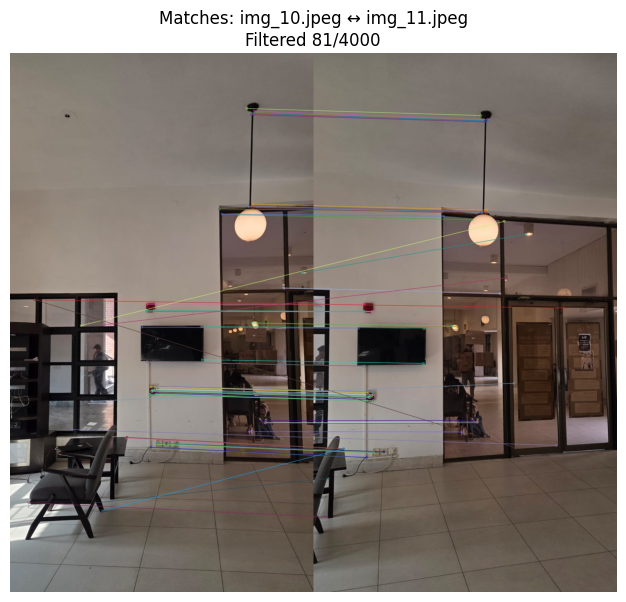

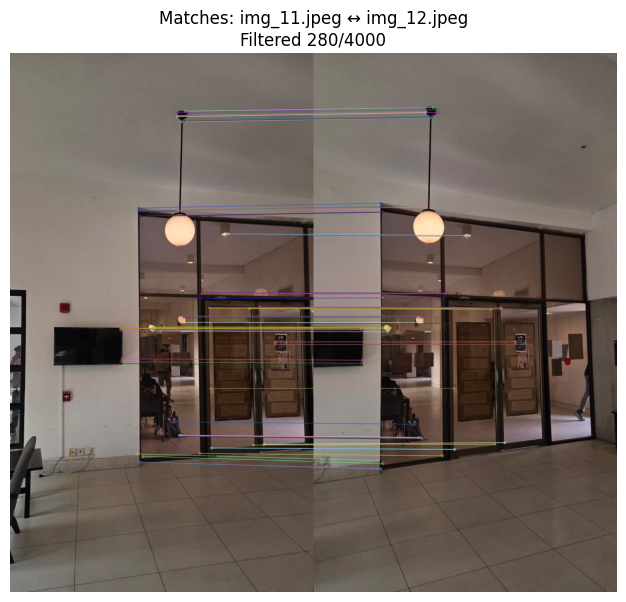

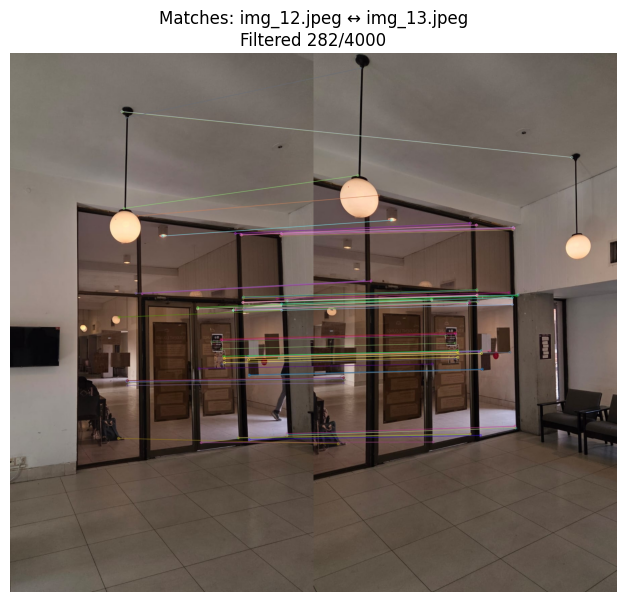

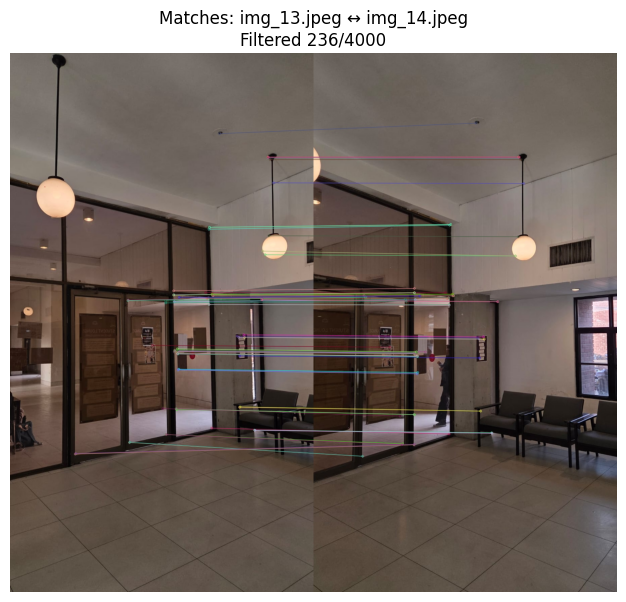

In [3]:
if summaries:
    preview_iter = summaries

    if isinstance(MAX_PREVIEW, int):
        preview_iter = itertools.islice(summaries, MAX_PREVIEW)
    
    for summary in preview_iter:
        image = mpimg.imread(summary.output_path)
        plt.figure(figsize=(14, 7))
        plt.imshow(image)
        plt.title(
            f"Matches: {summary.image_a.name} \u2194 {summary.image_b.name}\n"
            f"Filtered {summary.filtered_matches}/{summary.raw_matches}"
        )
        plt.axis('off')
        plt.show()
else:
    print('No images in assets directory.')
